In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import sklearn
import sklearn.preprocessing
import os
import matplotlib.pyplot as plt
import math

In [16]:
csv_data = pd.read_csv('climate_clean.csv', index_col=0)

csv_data['Datum'] = pd.to_datetime(csv_data['Datum'])
csv_data.describe()

,Windgeschw Max,Windgeschw Mittel,Niederschlag,Niederschlagsform,Sonnenstunden,Schneehoehe,Bedeckungsgrad,Dampfdruck Mittel,Luftdruck Mittel,Lufttemp Mittel,Relative Feuchte,Lufttemp Max,Lufttemp Min,Lufttemp Min Erdboden
count,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000,41272.000000
mean,-0.563684,-0.852494,-0.955561,2.141064,-0.626977,-0.979950,0.339642,-0.800839,-0.008593,0.197568,0.545691,0.275287,0.127789,0.092258
std,0.197634,0.078658,0.090362,2.718331,0.349836,0.059778,0.569118,0.076497,0.008600,0.135471,0.233100,0.157096,0.122663,0.124756
min,-0.940000,-0.996000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-0.976000,-0.057200,-0.316000,-0.620000,-0.256000,-0.408000,-0.540000
25%,-0.712000,-0.916000,-1.000000,0.000000,-0.958333,-1.000000,0.000000,-0.862000,-0.013300,0.098000,0.400000,0.157500,0.040000,0.004000
50%,-0.596000,-0.868000,-0.998000,1.000000,-0.708333,-1.000000,0.450000,-0.810000,-0.007000,0.202000,0.560000,0.276000,0.134000,0.098000
75%,-0.444000,-0.788000,-0.950000,6.000000,-0.375000,-1.000000,0.825000,-0.746000,-0.003700,0.300000,0.720000,0.392000,0.222000,0.190000
max,0.668000,-0.432000,0.360000,8.000000,0.341667,-0.140000,1.000000,-0.480000,0.021000,0.592000,1.000000,0.744000,0.490000,0.436000


In [17]:
print(csv_data.loc[0])

Datum                    1891-01-01 00:00:00
Windgeschw Max                        -0.232
Windgeschw Mittel                     -0.844
Niederschlag                              -1
Niederschlagsform                          0
Sonnenstunden                           -0.9
Schneehoehe                            -0.92
Bedeckungsgrad                            -1
Dampfdruck Mittel                     -0.914
Luftdruck Mittel                      0.0028
Lufttemp Mittel                       -0.072
Relative Feuchte                        0.76
Lufttemp Max                            0.01
Lufttemp Min                          -0.118
Lufttemp Min Erdboden                  0.032
Name: 0, dtype: object


### Convert pandas DataFrame to np array

In [18]:
# 'Niederschlagsform' from categorical to one hot
nm_onehot_df = pd.get_dummies(csv_data['Niederschlagsform'])
nm_onehot_df.columns = ['Niederschlagsform_{}'.format(i) for i in [0, 1, 4, 6, 7, 8, 9]]

modified_data = pd.concat([csv_data, nm_onehot_df], axis=1).drop('Niederschlagsform', axis=1)

In [19]:
# 'Datum' to (day of the year) and (year)
modified_data['Datum_DOY'] = modified_data['Datum'].dt.dayofyear
modified_data['Jahr'] = modified_data['Datum'].dt.year
modified_data.drop('Datum', axis=1, inplace=True)

modified_data['Datum_DOY'] /= 183
modified_data['Datum_DOY'] -= 1

year_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
modified_data['Jahr'] = year_scaler.fit_transform(modified_data[['Jahr']])

/usr/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
modified_data

,Windgeschw Max,Windgeschw Mittel,Niederschlag,Sonnenstunden,Schneehoehe,Bedeckungsgrad,Dampfdruck Mittel,Luftdruck Mittel,Lufttemp Mittel,Relative Feuchte,...,Lufttemp Min Erdboden,Niederschlagsform_0,Niederschlagsform_1,Niederschlagsform_4,Niederschlagsform_6,Niederschlagsform_7,Niederschlagsform_8,Niederschlagsform_9,Datum_DOY,Jahr
0,-0.232,-0.844,-1.000,-0.900000,-0.92,-1.000,-0.914,0.00280,-0.072,0.7600,...,0.032,1,0,0,0,0,0,0,-0.994536,-1.0
1,-0.600,-0.876,-1.000,-0.950000,-0.96,-0.325,-0.918,-0.01620,-0.056,0.6800,...,-0.070,1,0,0,0,0,0,0,-0.989071,-1.0
2,-0.360,-0.928,-0.950,-1.000000,-0.86,-0.075,-0.922,-0.00990,-0.004,0.3800,...,-0.116,0,1,0,0,0,0,0,-0.983607,-1.0
3,-0.360,-0.948,-0.836,-0.883333,-0.88,1.000,-0.872,-0.00600,0.036,0.8000,...,-0.170,0,1,0,0,0,0,0,-0.978142,-1.0
4,-0.440,-0.820,-0.962,-0.933333,-0.90,0.925,-0.906,-0.01060,-0.050,0.7400,...,-0.072,0,1,0,0,0,0,0,-0.972678,-1.0
5,-0.328,-0.808,-0.950,-0.900000,-0.92,1.000,-0.930,-0.01440,-0.116,0.7600,...,0.012,0,1,0,0,0,0,0,-0.967213,-1.0
6,-0.680,-0.868,-0.942,-0.958333,-0.92,1.000,-0.928,-0.00840,-0.116,0.8800,...,0.072,0,1,0,0,0,0,0,-0.961749,-1.0
7,-0.720,-0.608,-1.000,-1.000000,-0.96,0.675,-0.926,0.00080,-0.100,0.7800,...,0.074,1,0,0,0,0,0,0,-0.956284,-1.0
8,-0.696,-0.672,-1.000,-1.000000,-0.90,0.675,-0.942,-0.00110,-0.156,0.7400,...,0.072,1,0,0,0,0,0,0,-0.950820,-1.0
9,-0.780,-0.728,-1.000,-0.958333,-0.90,-0.075,-0.958,-0.01450,-0.228,0.7000,...,0.006,1,0,0,0,0,0,0,-0.945355,-1.0


In [21]:
# Conver to np array
raw_np_data = modified_data.values

print(raw_np_data.shape)
raw_np_data[0]

(41272, 22)


array([-0.232     , -0.844     , -1.        , -0.9       , -0.92      ,
       -1.        , -0.914     ,  0.0028    , -0.072     ,  0.76      ,
        0.01      , -0.118     ,  0.032     ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.99453552, -1.        ])

### Set up train/test split and batches

In [22]:
last_year = csv_data['Datum'].dt.year.iloc[-1]
TEST_YEAR_LENGTH = 4

split_index = (csv_data['Datum'].dt.year >= last_year - TEST_YEAR_LENGTH + 1).idxmax()

train_data = raw_np_data[:split_index, :]
test_data = raw_np_data[split_index:, :]

print(train_data.shape, test_data.shape)

(39811, 22) (1461, 22)


In [24]:
# return value will have shape (batch_size, series_length + 1, n_features)
# (the last element in the series is the target)
def generate_batch(data, batch_size, series_length):
    start_indices = np.random.randint(0, len(data) - series_length, size=batch_size)
    result = np.ndarray(shape=(batch_size, series_length+1, 22))
    
    for batch in range(batch_size):
        start = start_indices[batch]
        for i in range(series_length+1):
            result[batch, i, :] = data[i+start]
    
    return result

generate_batch(train_data, 1, 2)

array([[[-0.796     , -0.888     , -1.        , -0.125     ,
         -1.        , -0.25      , -0.794     , -0.0056    ,
          0.208     ,  0.64      ,  0.322     ,  0.108     ,
          0.12      ,  1.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.40437158, -0.66929134],
        [-0.8       , -0.828     , -0.974     , -0.46666667,
         -1.        ,  1.        , -0.758     , -0.0056    ,
          0.228     ,  0.82      ,  0.29      ,  0.134     ,
          0.07      ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.40983607, -0.66929134],
        [-0.832     , -0.816     , -0.982     , -0.66666667,
         -1.        ,  1.        , -0.76      , -0.0056    ,
          0.212     ,  0.86      ,  0.244     ,  0.194     ,
          0.21      ,  0.        ,  1.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.4

### Create simple model

In [25]:
FEATURES = 22

model = keras.models.Sequential()

model.add(keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(FEATURES, activation='softmax'))

model.build((None, 2, FEATURES))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                22272     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 22)                2838      
Total params: 33,430
Trainable params: 33,430
Non-trainable params: 0
_________________________________________________________________


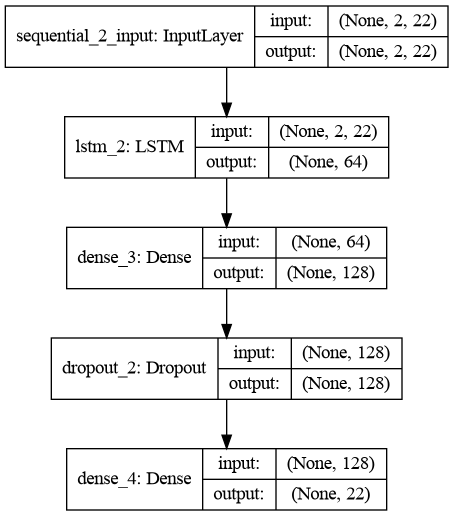

In [26]:
from IPython.display import Image
import pydot

keras.utils.plot_model(model, to_file=f'modelplot.png', show_shapes=True)

Image(f'modelplot.png')

In [27]:
batch_size = 256
n_batches = 1000

for i in range(n_batches):
    batch = generate_batch(train_data, batch_size, 2)
    model.fit(batch[:, :-1, :], batch[:, -1, :])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
256/256 [==============================] - 10s 38ms/step - loss: -7.7412 - acc: 0.1016
Epoch 1/1
256/256 [==============================] - 0s 376us/step - loss: -8.7951 - acc: 0.2344
Epoch 1/1
256/256 [==============================] - 0s 347us/step - loss: -12.3412 - acc: 0.2578
Epoch 1/1
256/256 [==============================] - 0s 359us/step - loss: -20.3727 - acc: 0.2695
Epoch 1/1
256/256 [==============================] - 0s 401us/step - loss: -37.8707 - acc: 0.2773
Epoch 1/1
256/256 [==============================] - 0s 372us/step - loss: -64.4926 - acc: 0.2891
Epoch 1/1
256/256 [==============================] - 0s 358us/step - loss: -70.7706 - acc: 0.1406
Epoch 1/1
256/256 [==============================] - 0s 372us/step - loss: -70.1357 - acc: 0.1172
Epoch 1/1
256/256 [==============================] - 0s 391us/step - loss: -70.7119 - acc: 0.1719
Epoch 1/1
256/256 [=======

256/256 [==============================] - 0s 401us/step - loss: -77.7152 - acc: 0.2461
Epoch 1/1
256/256 [==============================] - 0s 368us/step - loss: -76.9874 - acc: 0.2578
Epoch 1/1
256/256 [==============================] - 0s 375us/step - loss: -78.1981 - acc: 0.2031
Epoch 1/1
256/256 [==============================] - 0s 374us/step - loss: -77.7471 - acc: 0.2305
Epoch 1/1
256/256 [==============================] - 0s 368us/step - loss: -78.2322 - acc: 0.2695
Epoch 1/1
256/256 [==============================] - 0s 400us/step - loss: -78.0058 - acc: 0.2656
Epoch 1/1
256/256 [==============================] - 0s 390us/step - loss: -79.1616 - acc: 0.2305
Epoch 1/1
256/256 [==============================] - 0s 415us/step - loss: -76.6778 - acc: 0.2344
Epoch 1/1
256/256 [==============================] - 0s 410us/step - loss: -77.2505 - acc: 0.2266
Epoch 1/1
256/256 [==============================] - 0s 381us/step - loss: -77.7348 - acc: 0.2109
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 386us/step - loss: -79.1825 - acc: 0.2656
Epoch 1/1
256/256 [==============================] - 0s 373us/step - loss: -78.6552 - acc: 0.2773
Epoch 1/1
256/256 [==============================] - 0s 390us/step - loss: -78.8618 - acc: 0.3047
Epoch 1/1
256/256 [==============================] - 0s 384us/step - loss: -78.6467 - acc: 0.3359
Epoch 1/1
256/256 [==============================] - 0s 388us/step - loss: -78.5886 - acc: 0.3750
Epoch 1/1
256/256 [==============================] - 0s 375us/step - loss: -77.8585 - acc: 0.2812
Epoch 1/1
256/256 [==============================] - 0s 376us/step - loss: -78.6859 - acc: 0.2891
Epoch 1/1
256/256 [==============================] - 0s 379us/step - loss: -78.2827 - acc: 0.3047
Epoch 1/1
256/256 [==============================] - 0s 355us/step - loss: -78.8950 - acc: 0.3047
Epoch 1/1
256/256 [==============================] - 0s 379us/step - loss: -79.2965 - acc: 0.3398
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 418us/step - loss: -79.2898 - acc: 0.2539
Epoch 1/1
256/256 [==============================] - 0s 369us/step - loss: -80.2532 - acc: 0.3398
Epoch 1/1
256/256 [==============================] - 0s 374us/step - loss: -78.9994 - acc: 0.3945
Epoch 1/1
256/256 [==============================] - 0s 378us/step - loss: -78.3759 - acc: 0.2891
Epoch 1/1
256/256 [==============================] - 0s 354us/step - loss: -80.0360 - acc: 0.3320
Epoch 1/1
256/256 [==============================] - 0s 360us/step - loss: -78.3428 - acc: 0.3672
Epoch 1/1
256/256 [==============================] - 0s 381us/step - loss: -79.3553 - acc: 0.3281
Epoch 1/1
256/256 [==============================] - 0s 332us/step - loss: -79.2254 - acc: 0.3516
Epoch 1/1
256/256 [==============================] - 0s 384us/step - loss: -79.9084 - acc: 0.2891
Epoch 1/1
256/256 [==============================] - 0s 386us/step - loss: -78.4657 - acc: 0.2969
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 383us/step - loss: -79.6660 - acc: 0.3828
Epoch 1/1
256/256 [==============================] - 0s 395us/step - loss: -79.7003 - acc: 0.3633
Epoch 1/1
256/256 [==============================] - 0s 361us/step - loss: -80.0102 - acc: 0.3398
Epoch 1/1
256/256 [==============================] - 0s 378us/step - loss: -78.7460 - acc: 0.3594
Epoch 1/1
256/256 [==============================] - 0s 370us/step - loss: -79.1690 - acc: 0.4219
Epoch 1/1
256/256 [==============================] - 0s 351us/step - loss: -79.2950 - acc: 0.3828
Epoch 1/1
256/256 [==============================] - 0s 342us/step - loss: -79.0381 - acc: 0.3711
Epoch 1/1
256/256 [==============================] - 0s 376us/step - loss: -78.8692 - acc: 0.3633
Epoch 1/1
256/256 [==============================] - 0s 408us/step - loss: -80.7197 - acc: 0.3750
Epoch 1/1
256/256 [==============================] - 0s 394us/step - loss: -77.9477 - acc: 0.3828
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 393us/step - loss: -79.3795 - acc: 0.3867
Epoch 1/1
256/256 [==============================] - 0s 391us/step - loss: -79.7023 - acc: 0.3594
Epoch 1/1
256/256 [==============================] - 0s 369us/step - loss: -80.0834 - acc: 0.3789
Epoch 1/1
256/256 [==============================] - 0s 357us/step - loss: -78.7755 - acc: 0.3906
Epoch 1/1
256/256 [==============================] - 0s 384us/step - loss: -80.2036 - acc: 0.3672
Epoch 1/1
256/256 [==============================] - 0s 375us/step - loss: -78.8415 - acc: 0.3984
Epoch 1/1
256/256 [==============================] - 0s 349us/step - loss: -79.7392 - acc: 0.3438
Epoch 1/1
256/256 [==============================] - 0s 382us/step - loss: -77.5990 - acc: 0.3359
Epoch 1/1
256/256 [==============================] - 0s 372us/step - loss: -80.1611 - acc: 0.4336
Epoch 1/1
256/256 [==============================] - 0s 390us/step - loss: -78.7428 - acc: 0.3477
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 246us/step - loss: -79.4436 - acc: 0.3867
Epoch 1/1
256/256 [==============================] - 0s 281us/step - loss: -79.6244 - acc: 0.4062
Epoch 1/1
256/256 [==============================] - 0s 233us/step - loss: -79.5420 - acc: 0.3867
Epoch 1/1
256/256 [==============================] - 0s 295us/step - loss: -79.3287 - acc: 0.3828
Epoch 1/1
256/256 [==============================] - 0s 328us/step - loss: -79.2543 - acc: 0.3555
Epoch 1/1
256/256 [==============================] - 0s 363us/step - loss: -79.7330 - acc: 0.3789
Epoch 1/1
256/256 [==============================] - 0s 323us/step - loss: -80.3415 - acc: 0.3711
Epoch 1/1
256/256 [==============================] - 0s 345us/step - loss: -80.2684 - acc: 0.3516
Epoch 1/1
256/256 [==============================] - 0s 379us/step - loss: -78.7747 - acc: 0.3555
Epoch 1/1
256/256 [==============================] - 0s 310us/step - loss: -78.5143 - acc: 0.4102
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 405us/step - loss: -78.1728 - acc: 0.4219
Epoch 1/1
256/256 [==============================] - 0s 248us/step - loss: -78.3013 - acc: 0.3828
Epoch 1/1
256/256 [==============================] - 0s 311us/step - loss: -79.4010 - acc: 0.3086
Epoch 1/1
256/256 [==============================] - 0s 362us/step - loss: -79.5856 - acc: 0.3672
Epoch 1/1
256/256 [==============================] - 0s 367us/step - loss: -79.2248 - acc: 0.3438
Epoch 1/1
256/256 [==============================] - 0s 374us/step - loss: -80.3575 - acc: 0.3711
Epoch 1/1
256/256 [==============================] - 0s 353us/step - loss: -81.0747 - acc: 0.3867
Epoch 1/1
256/256 [==============================] - 0s 314us/step - loss: -78.1817 - acc: 0.3906
Epoch 1/1
256/256 [==============================] - 0s 329us/step - loss: -79.6146 - acc: 0.3828
Epoch 1/1
256/256 [==============================] - 0s 332us/step - loss: -78.6179 - acc: 0.4023
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 375us/step - loss: -80.5482 - acc: 0.4531
Epoch 1/1
256/256 [==============================] - 0s 330us/step - loss: -78.4666 - acc: 0.4609
Epoch 1/1
256/256 [==============================] - 0s 373us/step - loss: -80.3369 - acc: 0.3711
Epoch 1/1
256/256 [==============================] - 0s 356us/step - loss: -78.8360 - acc: 0.3125
Epoch 1/1
256/256 [==============================] - 0s 373us/step - loss: -79.1675 - acc: 0.3945
Epoch 1/1
256/256 [==============================] - 0s 364us/step - loss: -78.3215 - acc: 0.3828
Epoch 1/1
256/256 [==============================] - 0s 363us/step - loss: -81.1875 - acc: 0.4531
Epoch 1/1
256/256 [==============================] - 0s 326us/step - loss: -78.0310 - acc: 0.4180
Epoch 1/1
256/256 [==============================] - 0s 371us/step - loss: -78.3747 - acc: 0.3711
Epoch 1/1
256/256 [==============================] - 0s 343us/step - loss: -79.7010 - acc: 0.4258
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 396us/step - loss: -79.4126 - acc: 0.3164
Epoch 1/1
256/256 [==============================] - 0s 375us/step - loss: -80.3156 - acc: 0.4180
Epoch 1/1
256/256 [==============================] - 0s 376us/step - loss: -79.6516 - acc: 0.4023
Epoch 1/1
256/256 [==============================] - 0s 368us/step - loss: -78.8848 - acc: 0.3633
Epoch 1/1
256/256 [==============================] - 0s 355us/step - loss: -79.7459 - acc: 0.3555
Epoch 1/1
256/256 [==============================] - 0s 395us/step - loss: -78.9380 - acc: 0.4219
Epoch 1/1
256/256 [==============================] - 0s 369us/step - loss: -79.5183 - acc: 0.3945
Epoch 1/1
256/256 [==============================] - 0s 382us/step - loss: -79.3852 - acc: 0.3906
Epoch 1/1
256/256 [==============================] - 0s 390us/step - loss: -78.4448 - acc: 0.3828
Epoch 1/1
256/256 [==============================] - 0s 362us/step - loss: -78.7583 - acc: 0.3828
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 378us/step - loss: -78.5018 - acc: 0.3516
Epoch 1/1
256/256 [==============================] - 0s 370us/step - loss: -79.8597 - acc: 0.3633
Epoch 1/1
256/256 [==============================] - 0s 391us/step - loss: -78.9942 - acc: 0.3477
Epoch 1/1
256/256 [==============================] - 0s 365us/step - loss: -78.9391 - acc: 0.3984
Epoch 1/1
256/256 [==============================] - 0s 385us/step - loss: -79.4638 - acc: 0.4336
Epoch 1/1
256/256 [==============================] - 0s 378us/step - loss: -79.5197 - acc: 0.4258
Epoch 1/1
256/256 [==============================] - 0s 374us/step - loss: -79.2807 - acc: 0.3789
Epoch 1/1
256/256 [==============================] - 0s 392us/step - loss: -78.9988 - acc: 0.4688
Epoch 1/1
256/256 [==============================] - 0s 374us/step - loss: -80.6305 - acc: 0.3281
Epoch 1/1
256/256 [==============================] - 0s 396us/step - loss: -80.1665 - acc: 0.2891
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 385us/step - loss: -79.2786 - acc: 0.3711
Epoch 1/1
256/256 [==============================] - 0s 384us/step - loss: -77.9107 - acc: 0.3711
Epoch 1/1
256/256 [==============================] - 0s 393us/step - loss: -78.9892 - acc: 0.4336
Epoch 1/1
256/256 [==============================] - 0s 405us/step - loss: -79.2727 - acc: 0.4297
Epoch 1/1
256/256 [==============================] - 0s 371us/step - loss: -78.5379 - acc: 0.3594
Epoch 1/1
256/256 [==============================] - 0s 347us/step - loss: -79.4417 - acc: 0.4258
Epoch 1/1
256/256 [==============================] - 0s 367us/step - loss: -80.2847 - acc: 0.3672
Epoch 1/1
256/256 [==============================] - 0s 399us/step - loss: -78.8837 - acc: 0.3984
Epoch 1/1
256/256 [==============================] - 0s 392us/step - loss: -79.1891 - acc: 0.4219
Epoch 1/1
256/256 [==============================] - 0s 393us/step - loss: -79.5120 - acc: 0.3867
Epoch 1/1
256/256 [===========

256/256 [==============================] - 0s 335us/step - loss: -79.5242 - acc: 0.4453
Epoch 1/1
256/256 [==============================] - 0s 334us/step - loss: -79.0533 - acc: 0.4141
Epoch 1/1
256/256 [==============================] - 0s 334us/step - loss: -79.4774 - acc: 0.3633
Epoch 1/1
256/256 [==============================] - 0s 359us/step - loss: -79.3484 - acc: 0.4023
Epoch 1/1
256/256 [==============================] - 0s 333us/step - loss: -78.3472 - acc: 0.4180
Epoch 1/1
256/256 [==============================] - 0s 340us/step - loss: -79.8540 - acc: 0.3438
Epoch 1/1
256/256 [==============================] - 0s 367us/step - loss: -79.7111 - acc: 0.4219
